# The Global State of Human Trafficking

In [141]:
import os
import sqlite3
import csv

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

**CODE to create database and table within the database.

In [142]:
con = sqlite3.connect("GlobalDatasetSept2018.db")
cur = con.cursor()
cur.execute("CREATE TABLE IF NOT EXISTS victims_table (gender STR, majorityEntry STR, majorityStatusAtExploit STR, ageBroad STR, citizenship STR, yearOfRegistration STR, Datasource STR, CountryOfExploitation STR, typeOfExploitConcatenated STR, RecruiterRelationship STR)")

**CODE to transfer columns of data to new database.

In [143]:
with open('Global_Dataset_3_Sept_2018.csv','r') as victims:
    dr = csv.DictReader(victims)
    to_db = [(i['gender'],
              i['majorityEntry'],
              i['majorityStatusAtExploit'],
              i['ageBroad'],
              i['citizenship'],
              i['yearOfRegistration'],
              i['Datasource'],
              i['CountryOfExploitation'],
              i['typeOfExploitConcatenated'],
              i['RecruiterRelationship']) for i in dr]
    cur.executemany(
        "INSERT INTO victims_table VALUES "
        "(?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)    
    con.commit()

CODE to retrieve data from SQL database into a python object.

In [144]:
df = pd.read_sql("SELECT * FROM victims_table", con)

**CODE to replace missing values ("-99") with NaN.

In [145]:
df.replace(-99, np.nan, regex=True, inplace=True)

**CODE to rename columns in SQL database.

In [146]:
df.rename(
    columns={
        'Gender':'Gender',
        'majorityEntry': 'Entry Age',
        'majorityStatusAtExploit': 'Exploitation Age',
        'ageBroad': 'Assistance Age', 
        'citizenship': 'Country Origin', 
        'yearOfRegistration': 'Year Registration', 
        'Datasource': 'Contact Method', 
        'CountryOfExploitation': 'Country Exploitation',
        'typeOfExploitConcatenated': 'Exploitation Type',
        'recruitment_relation': 'Recruiter Relation'
    }, 
    inplace=True)

In [147]:
df

,Gender,Entry Age,Exploitation Age,Assistance Age,Country Origin,Year Registration,Contact Method,Country Exploitation,Exploitation Type,Recruiter Relation
0,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
1,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
2,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
3,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
4,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
5,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
6,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
7,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
8,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
9,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None


### CATPLOT showing Year of Regristration

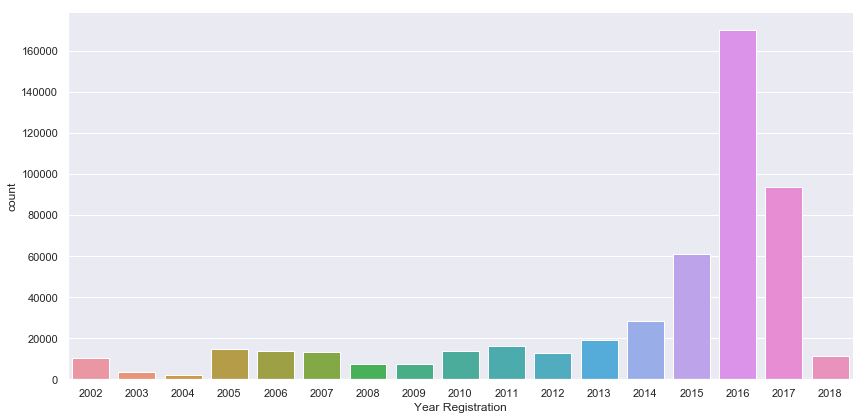

In [148]:
catplot(
    x="Year Registration",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

The catplot shows how few cases were reported to human trafficking agencies from 2002 to 2014. This could be due to a number a factors including limited reporting resources and decreased awareness. 

### CATPLOT showing HOW victims were found

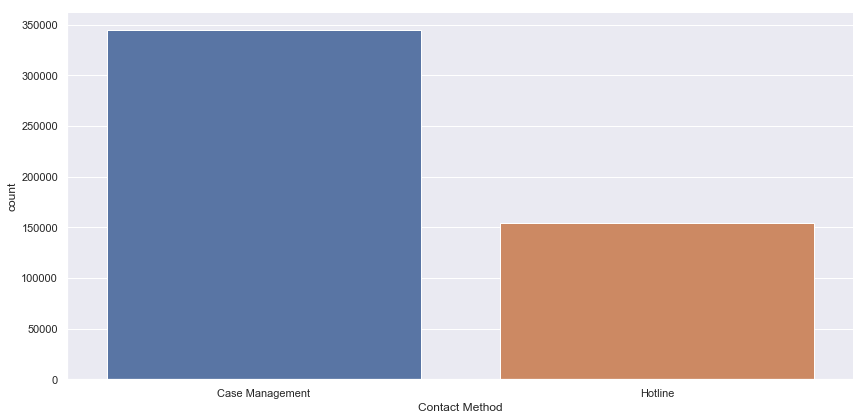

In [156]:
catplot(
    x="Contact Method",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

^^Comment

### CATPLOT showing gender count.

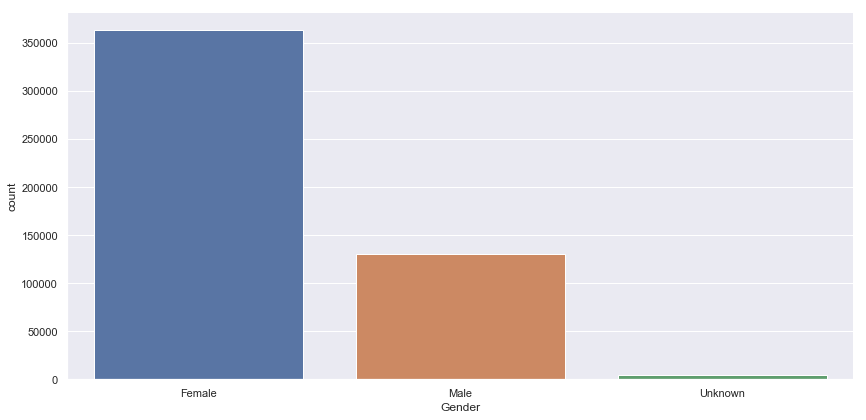

In [149]:
catplot(
    x="Gender",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

^^Comment

### CATPLOT showing Age of Assistance

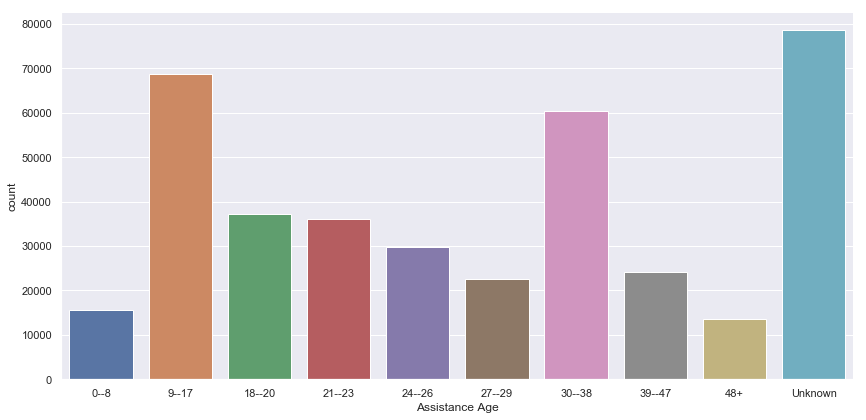

In [150]:
catplot(
    x="Assistance Age",
    data=df,
    kind="count",
    height=6,
    aspect=2,
    order= ('0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38', '39--47', '48+', 'Unknown'),
)

^^Comment

### Catplot showing Age of Exploitation

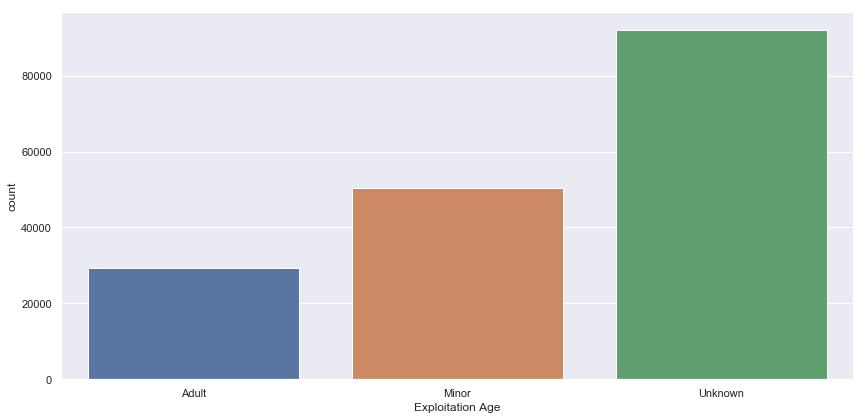

In [151]:
catplot(
    x="Exploitation Age",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

^^Comment

### CATPLOT showing Country of Origin

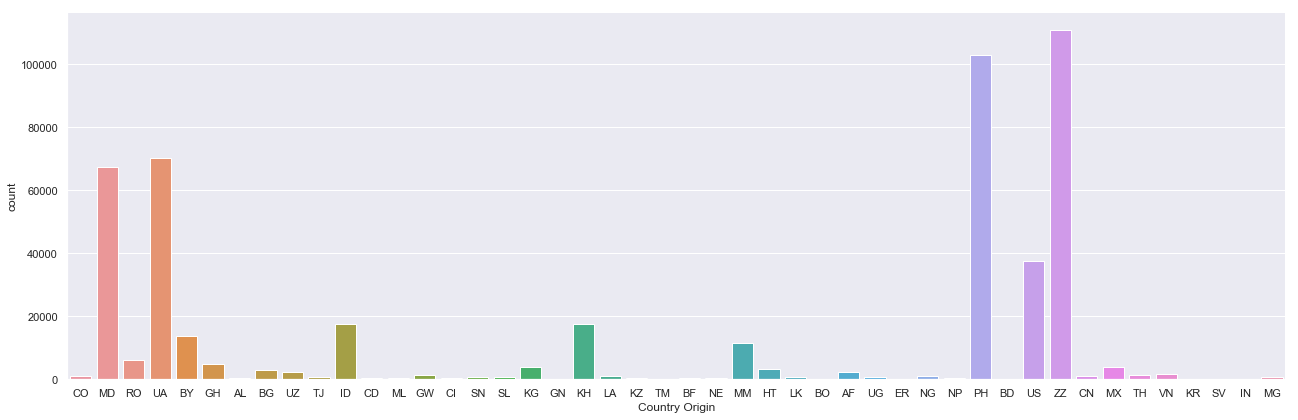

In [152]:
catplot(
    x="Country Origin",
    data=df,
    kind="count",
    height=6,
    aspect=3,
)

^^Comment

### CATPLOT showing Country of Exploitation

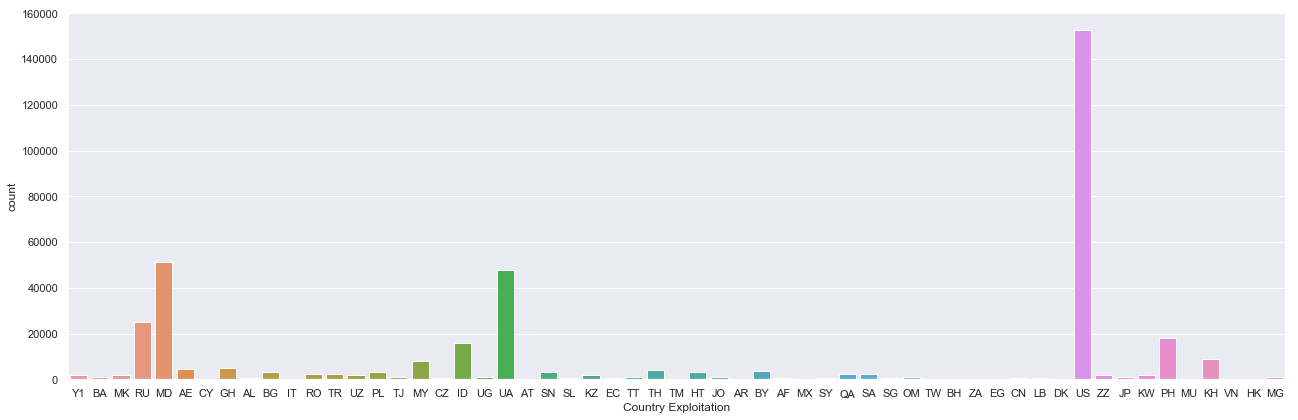

In [153]:
catplot(
    x="Country Exploitation",
    data=df,
    kind="count",
    height=6,
    aspect=3,
)

^^Comment

### CATPLOT showing to what end the victims were trafficked

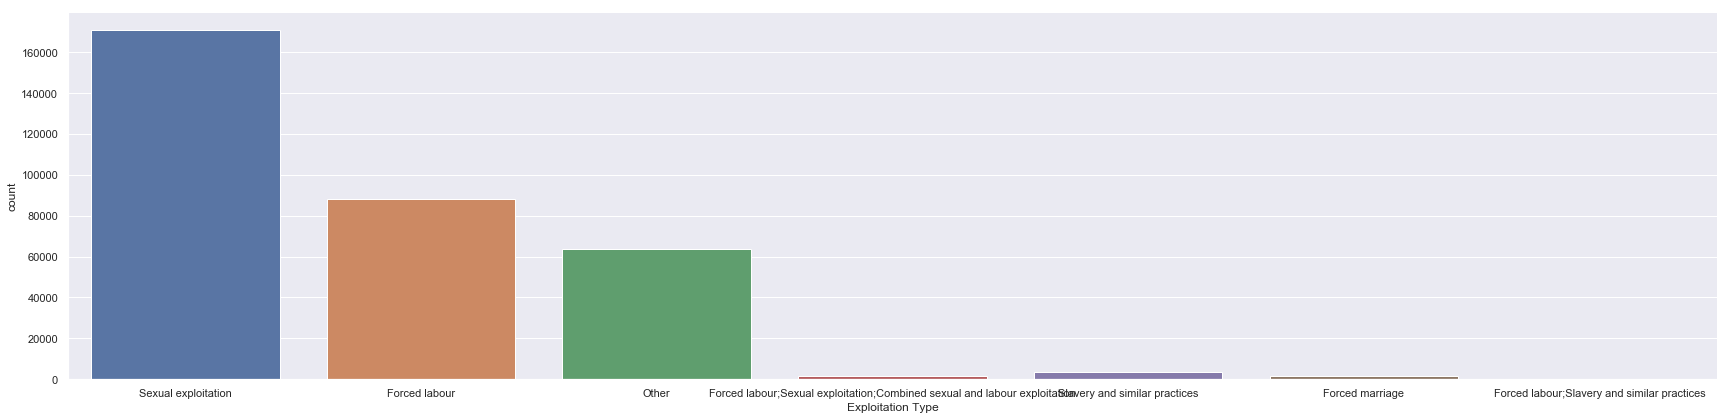

In [154]:
catplot(
    x="Exploitation Type",
    data=df,
    kind="count",
    height=6,
    aspect=4,
)

^^Comment

### CATPLOT showing the recruiter's relationship to the victim

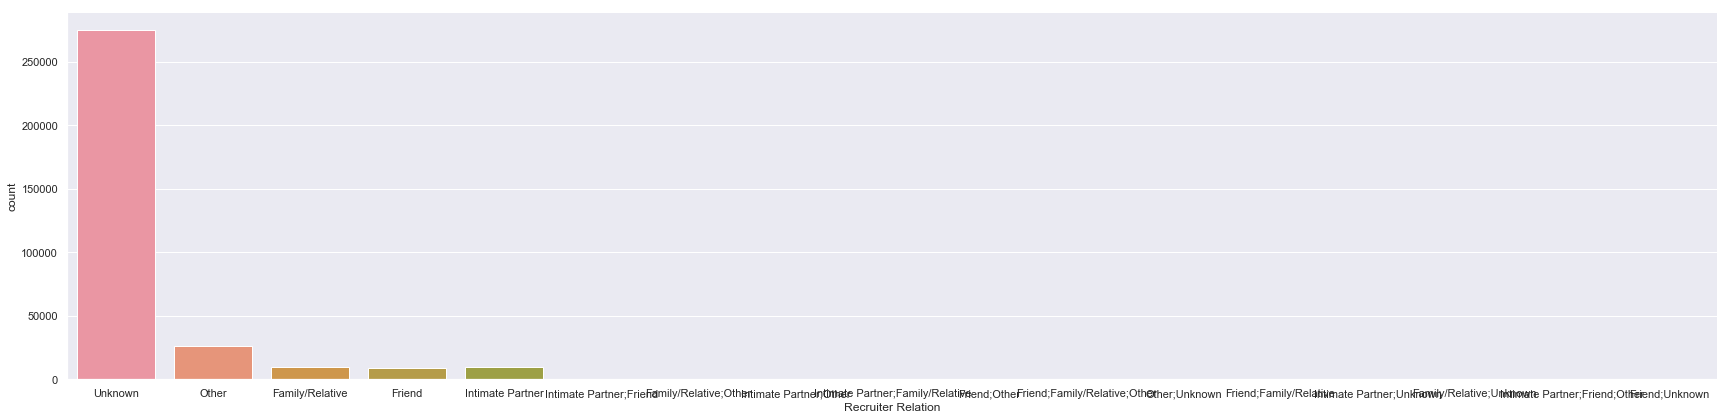

In [155]:
catplot(
    x="Recruiter Relation",
    data=df,
    kind="count",
    height=6,
    aspect=4,
)

^^Comment